In [1]:
import torch
import numpy as np

In [2]:
batch_size=1000
a=0
b=1

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,45)
        self.fc2 = nn.Linear(45,45)
        self.fc3 = nn.Linear(45,25) 
        self.fc4 = nn.Linear(25,25)
        self.fc5 = nn.Linear(25,1)
      


    def forward(self, x):
        x = F.softplus(self.fc1(x))
        x = F.softplus(self.fc2(x))
        x = F.softplus(self.fc3(x))    
        x = F.softplus(self.fc4(x))
        x = self.fc5(x)
        return x


net = Net()
net

Net(
  (fc1): Linear(in_features=1, out_features=45, bias=True)
  (fc2): Linear(in_features=45, out_features=45, bias=True)
  (fc3): Linear(in_features=45, out_features=25, bias=True)
  (fc4): Linear(in_features=25, out_features=25, bias=True)
  (fc5): Linear(in_features=25, out_features=1, bias=True)
)

In [4]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [5]:
from torch.autograd import grad
x_0=torch.ones((batch_size,1))*a
y_0_train=torch.ones((batch_size,1))*1
for epoch in range(1000):
    optimizer.zero_grad()
    train_x=torch.rand((batch_size,1),requires_grad=True,dtype=torch.float)*(b-a)+a
    y_hat = net(train_x)     
    y_0=net(x_0)   
   # dy_hat=grad(y_hat,train_x,torch.ones(batch_size,1),allow_unused=True,retain_graph=True,create_graph=True)[0]
    dy_hat=grad(y_hat.sum(),train_x,allow_unused=True,retain_graph=True,create_graph=True)[0]
    loss=nn.MSELoss()
    Loss=loss(dy_hat-y_hat,torch.zeros(batch_size,1))+loss(y_0,y_0_train)
    Loss.backward(retain_graph=True)
    optimizer.step()
    if epoch % 100 == 99: 
        print('[%d], loss: %.10f'%(epoch+1,Loss.item()))

[100], loss: 0.0032495707
[200], loss: 0.0000239357
[300], loss: 0.0000185567
[400], loss: 0.0000164173
[500], loss: 0.0000143891
[600], loss: 0.0000128205
[700], loss: 0.0000125346
[800], loss: 0.0000099440
[900], loss: 0.0000096190
[1000], loss: 0.0000209729


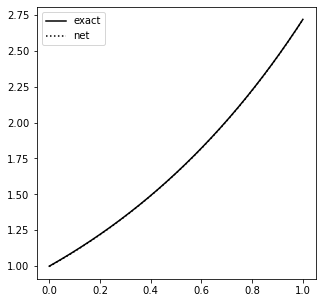

In [8]:
import matplotlib.pyplot as plt
def exact(x):
    return torch.exp(x)
train_x=torch.linspace(a, b, batch_size).view(-1,1)
y=exact(train_x)
y_net=net(train_x)
plt.figure(figsize=(5, 5))
plt.plot(train_x.detach().numpy(),y.detach().numpy(),'k-',label="exact")
plt.plot(train_x.detach().numpy(),y_net.detach().numpy(),'k:',label="net") 
plt.legend ()